In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
fake_data = pd.read_csv('../../data/fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
# add class column to fake_data and give it value of 0
fake_data['class'] = 0
fake_data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
true_data = pd.read_csv('../../data/true.csv')
print(len(true_data))
true_data.head()

21417


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
# add class column to true_data and give it value of 1
true_data['class'] = 1
true_data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
## drop the title, subject, date columns from both files, bcz we are not using them
# and we want to keep the data clean
fake_data.drop(['title', 'subject', 'date'], axis=1, inplace=True)
true_data.drop(['title', 'subject', 'date'], axis=1, inplace=True) 

In [17]:
# Sample 10% of each for dor development phase
# fake_sample = fake_data.sample(frac=0.01, random_state=42)
# true_sample = true_data.sample(frac=0.01, random_state=42)
# data = pd.concat([fake_sample, true_sample])

#  merge the two datasets
data = pd.concat([fake_data, true_data])


In [18]:
# check for missing values
data.isnull().sum()

text     0
class    0
dtype: int64

In [19]:
# shuffle the dataset to prevent the model to get biased
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\raipr\AppData\Local\Temp\ipykernel_3692\179487192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', order=data['class'].value_counts().index, palette='viridis')


<Axes: xlabel='class', ylabel='count'>

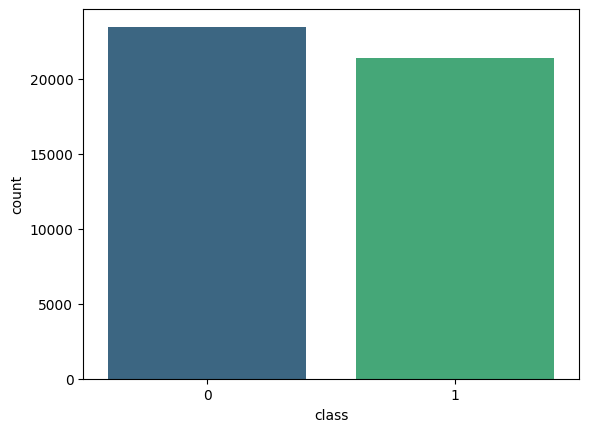

In [20]:
# Now Let’s explore the unique values in the each category using below code.
sns.countplot(data=data, x='class', order=data['class'].value_counts().index, palette='viridis')

### Preprocessing

In [21]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raipr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raipr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# define a function to clean the text

def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(
            token.lower()
            for token in str(sentence).split()
            if token not in stopwords.words('english')
         )
        )

    return preprocessed_text

In [23]:
import os
import pandas as pd

preprocessed_data = preprocess_text(data['text'].values)

100%|██████████| 44898/44898 [2:20:10<00:00,  5.34it/s]      


In [24]:
# Create folder to save the preprocessed data
os.makedirs('../../data/processed', exist_ok=True)

# Save the DataFrame as a pickle
data.to_pickle('../../data/processed/preprocessed_data.pkl')

In [25]:
# Load the preprocessed data
data = pd.read_pickle('../../data/processed/preprocessed_data.pkl')

### Split data for train and test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.25)


### vectorization

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

### Model Training and Testing

***Logistic Regression***

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(x_train, y_train)

# testing the model
y_pred = logisticRegression_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5947
           1       0.98      0.99      0.99      5278

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



***Decision Tree***

In [29]:
from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(x_train, y_train)

# testing the model
y_pred = decisionTree_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5947
           1       1.00      1.00      1.00      5278

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



***Random Forest Classifier***

In [30]:
from sklearn.ensemble import RandomForestClassifier

randomForest_model = RandomForestClassifier()
randomForest_model.fit(x_train, y_train)

# testing the model
y_pred = randomForest_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5947
           1       0.99      0.99      0.99      5278

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



***Support Vector Machine***

In [31]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

# testing the model
y_pred = svc_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5947
           1       0.99      0.99      0.99      5278

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



***K-Nrearest Neighbours***

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# testing the model
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      5947
           1       0.93      0.36      0.52      5278

    accuracy                           0.69     11225
   macro avg       0.78      0.67      0.64     11225
weighted avg       0.77      0.69      0.65     11225



***Naive Bayes***

In [33]:
from sklearn.naive_bayes import MultinomialNB

naiveBayes_model = MultinomialNB()
naiveBayes_model.fit(x_train, y_train)

# testing the model
y_pred = naiveBayes_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5947
           1       0.94      0.93      0.93      5278

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



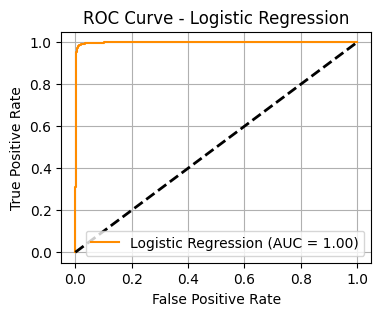

In [34]:
import sys
sys.path.append('../../')

from src.visualization.plot_roc import plot_roc_auc

# Plot ROC curve for all models
plot_roc_auc(logisticRegression_model, x_test, y_test, model_name="Logistic Regression")


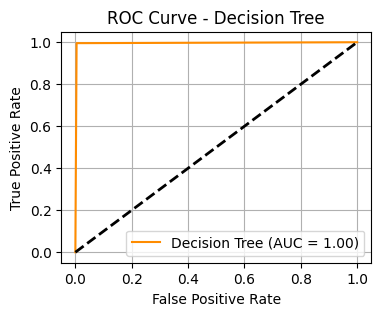

In [35]:
# Plot ROC curve for decision tree model
plot_roc_auc(decisionTree_model, x_test, y_test, model_name="Decision Tree")

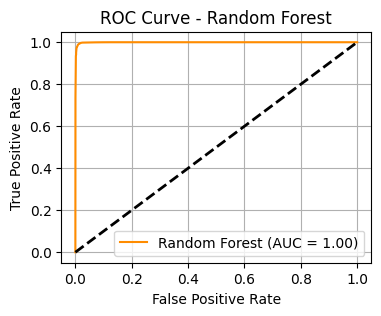

In [36]:
# Plot ROC curve for random forest model
plot_roc_auc(randomForest_model, x_test, y_test, model_name="Random Forest")

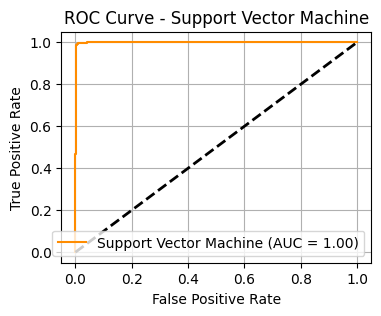

In [37]:
# Plot ROC curve for support vector machine model
plot_roc_auc(svc_model, x_test, y_test, model_name="Support Vector Machine")

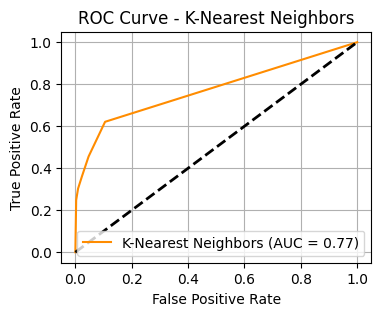

In [38]:
# Plot ROC curve for K-Nearest Neighbors model
plot_roc_auc(knn_model, x_test, y_test, model_name="K-Nearest Neighbors")

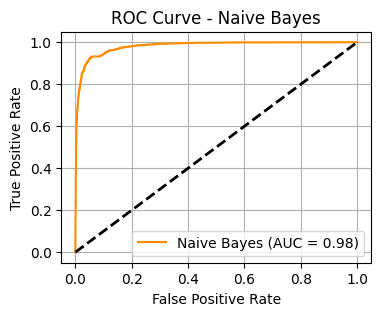

In [39]:
# Plot ROC curve for Naive Bayes model
plot_roc_auc(naiveBayes_model, x_test, y_test, model_name="Naive Bayes")